## `Handling Univariate Missing Data (Categorical Missing Data)`

- Here also we have mainly two techniques to impute the *`Categorical Missing Values`*:
    - **`Most frequent value`**
        - Here in *`Categorical`* data if the *`missing values`* are *`MCAR`* and *`<5%`* then we can replace them with *`Mode`*.
        - Here the category we used as *`Mode`* must be more repetatitve than the other categories in that column.
        - It is easy to use but it changes the distribution of the data.
    - **`Create a new category`**
        - Create a new category named `Missing`.
        - Here the *`missing values`* are *`MCAR`* and *`>5%`*.
        - It is like the *`Arbitrary Missing Imputation`* technique of the *`Numerical`* data.
        - It is also easy to use, but it creates a randomness in the data which is not good.

In [35]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')

### `Most frequent value(mode) Technique`

In [36]:
# importing datasets with required columns

df = pd.read_csv('datasets/cat_train.csv', usecols=['GarageQual','FireplaceQu','SalePrice'])
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [37]:
# How much values are missing in each category

df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

**Let's work on the column `GarageQual` where less number of missing values (around `5%`)**

In [38]:
# Checking presence of each categories in that column

df['GarageQual'].value_counts().sort_values(ascending=False)

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

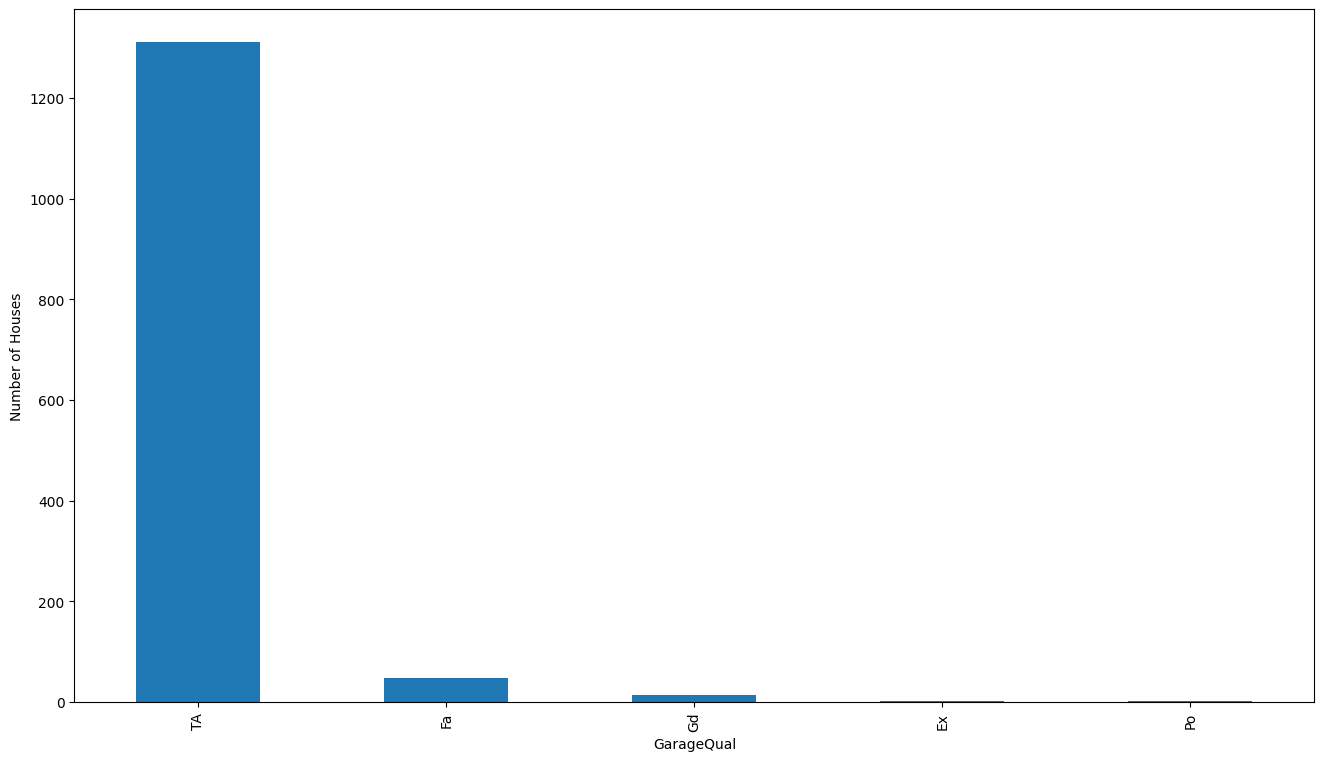

In [39]:
# Visualizing the numbers

plt.figure(figsize=(16, 9))
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel("GarageQual")
plt.ylabel("Number of Houses")
plt.show()

**Notes:**

- Here we can see the category `TA` is present most of the time.

In [40]:
# So the most frequent value in this column will be

print(f"The most frequent value in the column GarageQual is: {df['GarageQual'].mode()[0]}")

The most frequent value in the column GarageQual is: TA


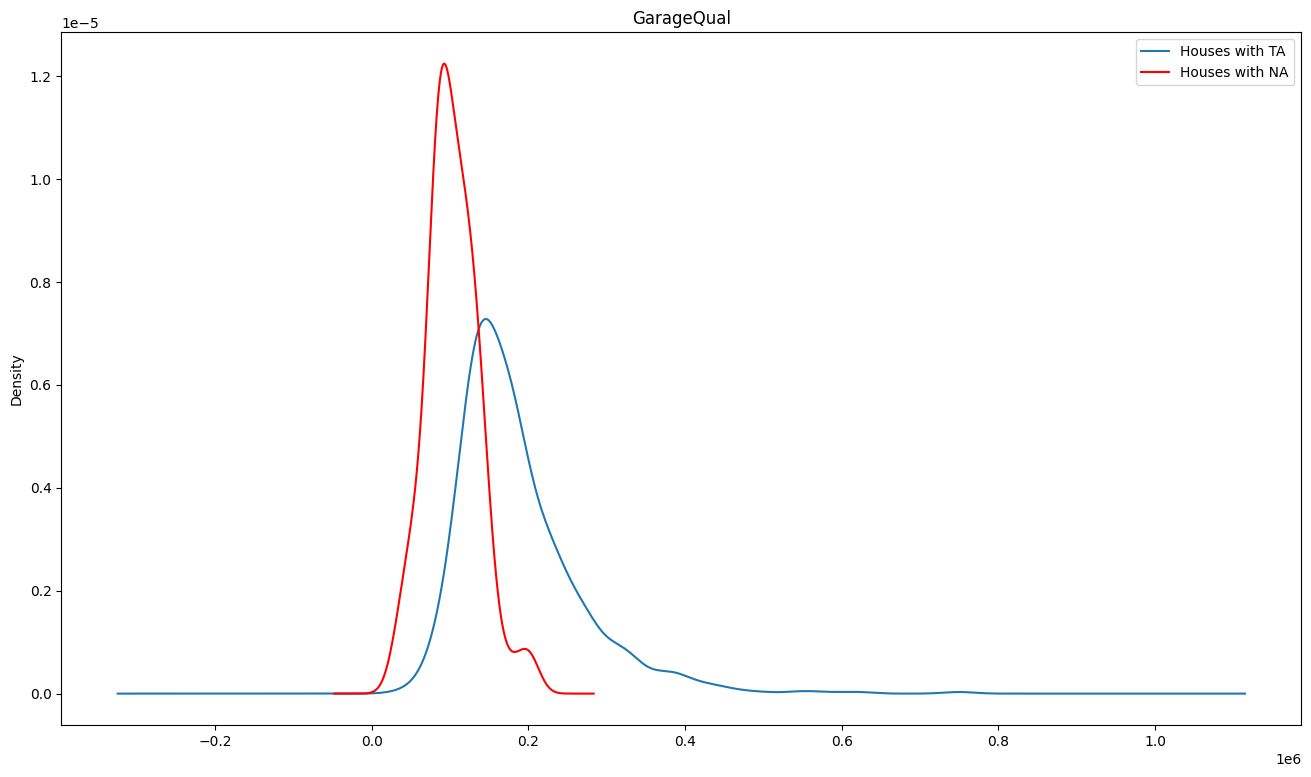

In [41]:
# Side by side comparison between category TA and Null values

fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(111)

# plotting PDF of 'SalePrice' for all the rows where value of 'GarageQual' is "TA"
df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax)

# plotting PDF of 'SalePrice' for all the rows where value of 'GarageQual' is "Null"
df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('GarageQual')
plt.show()

**Notes:**

- Here we can see that distribution of category `TA` is less picked than `Null` values distribution.
- Let's replace the missing values with mode and let's see the changes in the graph.

In [42]:
# Storing the distribution of TA to a variable so we can use it later

temp = df[df['GarageQual']=='TA']['SalePrice']

In [43]:
# Here we are imputing the missing values using 'TA'

df['GarageQual'].fillna('TA', inplace=True)

In [44]:
# Let's again see the numbers of the category after imputation

df['GarageQual'].value_counts().sort_values(ascending=False)

TA    1392
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

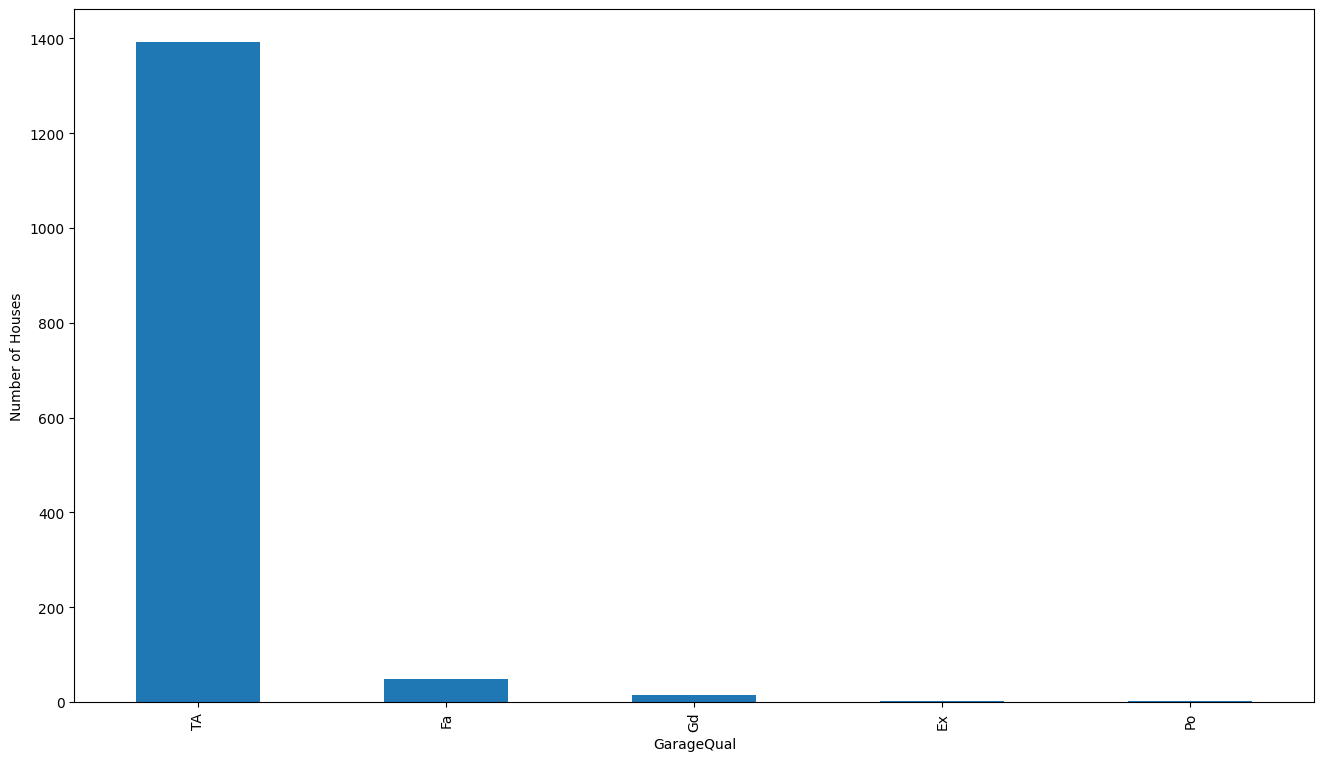

In [45]:
# Visualize the result

plt.figure(figsize=(16, 9))
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel("GarageQual")
plt.ylabel("Number of Houses")
plt.show()

**Notes:**

- Now we can see that the number of `TA` has increased.

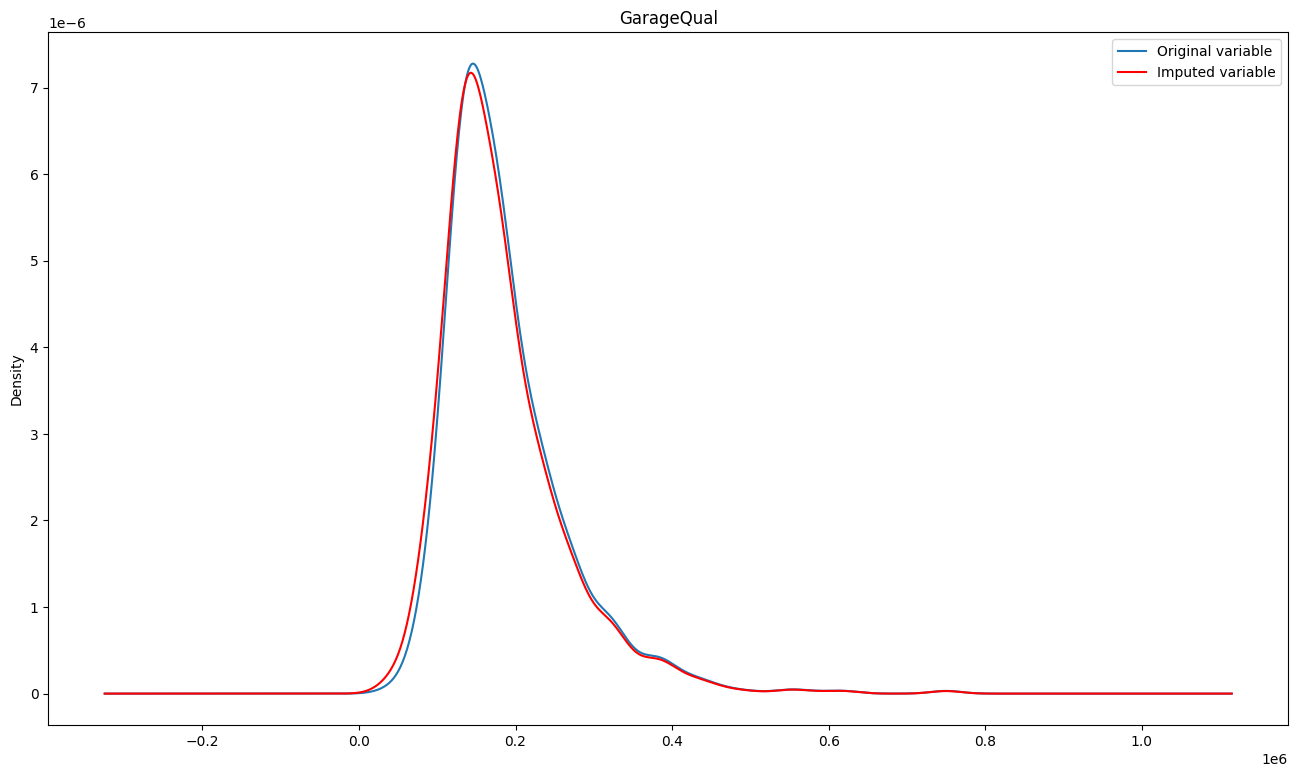

In [46]:
# Now doing comparison with old graph

fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(111)

# original distribution
temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('GarageQual')
plt.show()

**Notes:**

- So now we can see that the distribution of `TA` becomes same with the `missing values` distribution as the number of missing values were around `5%`.

**Now applying same technique on the column `FireplaceQu` where `missing values` are almost `50%`**

In [47]:
# Checking number of each categories in the column

df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

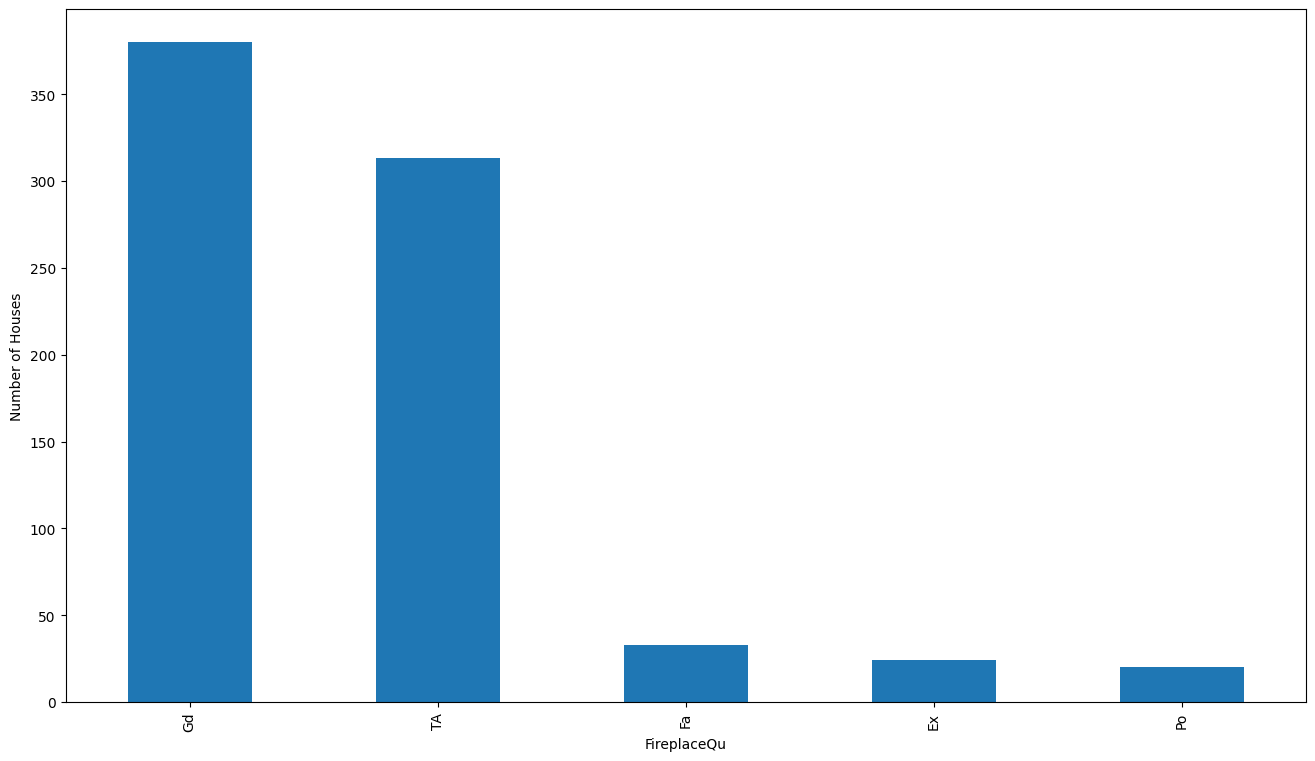

In [48]:
# Visualize the result

plt.figure(figsize=(16, 9))
df['FireplaceQu'].value_counts().plot.bar()
plt.xlabel("FireplaceQu")
plt.ylabel("Number of Houses")
plt.show()

**Notes:**

- Here we can see both the categories `GD` and `TA` are almost equal.

In [49]:
# So the most frequent value in this column will be

print(f"The most frequent value in the column FireplaceQu is: {df['FireplaceQu'].mode()[0]}")

The most frequent value in the column FireplaceQu is: Gd


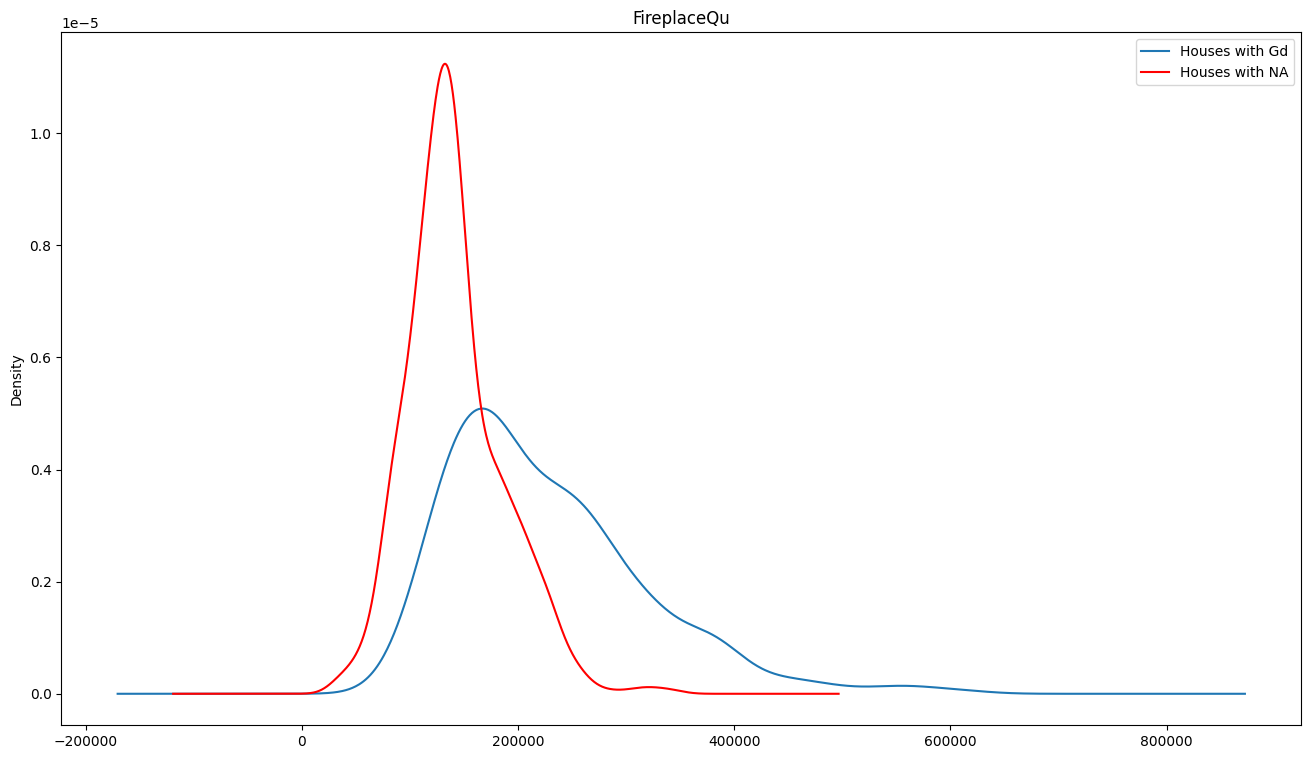

In [50]:
# Side by side comparison between category GD and Null values

fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(111)

# plotting PDF of 'SalePrice' for all the rows where value of 'FireplaceQu' is "Gd"
df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)

# plotting PDF of 'SalePrice' for all the rows where value of 'FireplaceQu' is "Null"
df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with Gd', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('FireplaceQu')
plt.show()

**Now agin doing the imputation**

In [51]:
# Storing the distribution of GD to a variable so we can use it later

temp = df[df['FireplaceQu']=='Gd']['SalePrice']

In [52]:
# Here we are imputing the missing values using 'Gd'

df['FireplaceQu'].fillna('Gd', inplace=True)

In [53]:
# Let's again see the number of appearance of each category after imputation

df['FireplaceQu'].value_counts().sort_values(ascending=False)

Gd    1070
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64

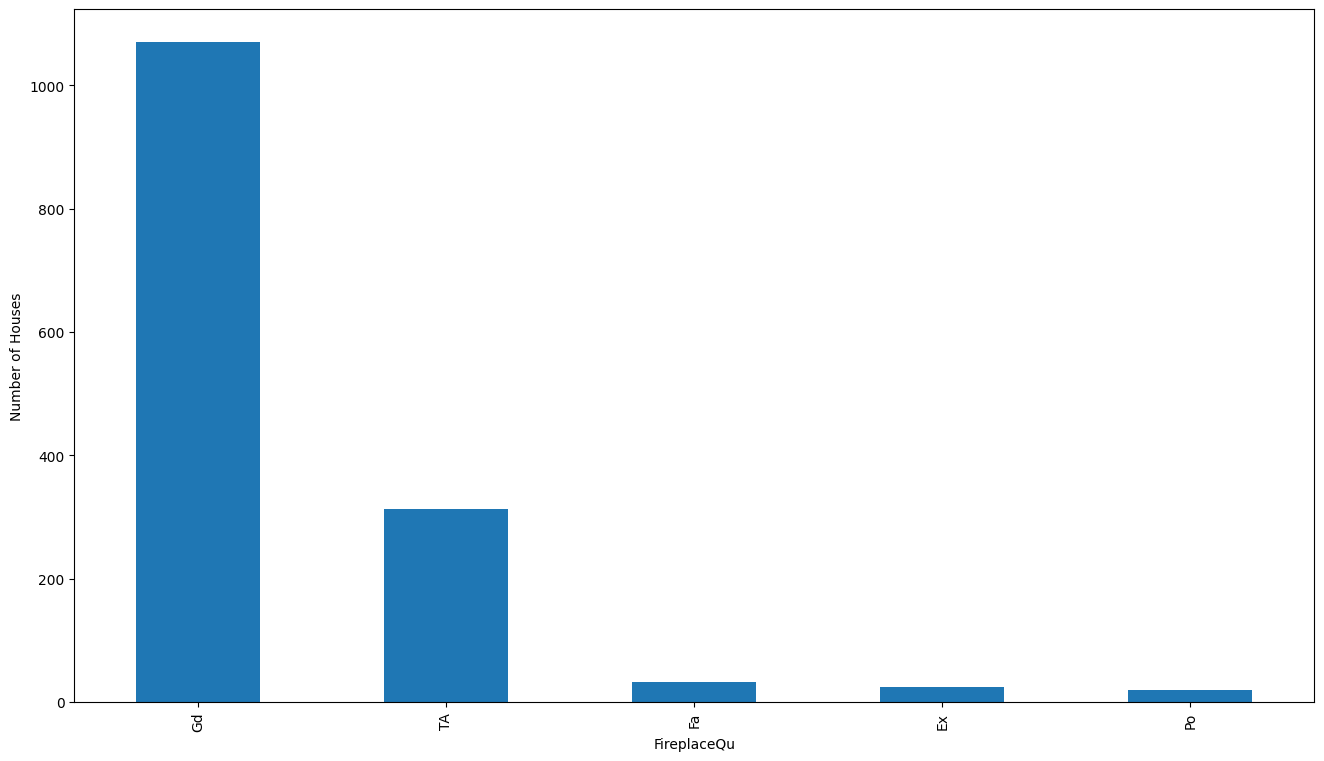

In [55]:
# Visualize the result

plt.figure(figsize=(16, 9))
df['FireplaceQu'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel("FireplaceQu")
plt.ylabel("Number of Houses")
plt.show()

**Notes:**

- Here the numbers of `Gd` has become so much as there are too many missing values.

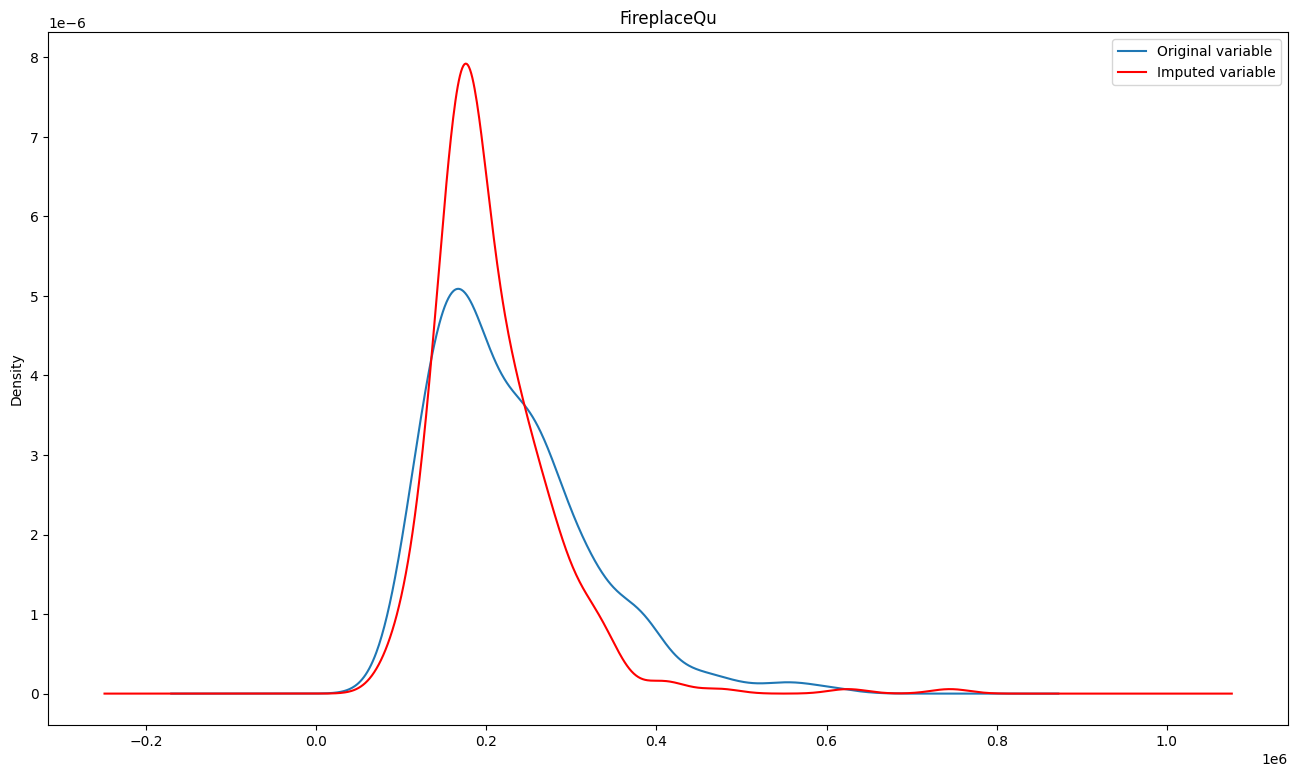

In [56]:
# Now doing comparison with old graph

fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(111)

# original distribution
temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['FireplaceQu'] == 'TA']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('FireplaceQu')
plt.show()

**Notes:**

- Here also we can see the distribution is not similar as there are too many *`missing values`* an dthe category with which we replaced them was also not the dominant one.

#### Doing the same work as above using `Scikitlearn`

In [57]:
# Doing train test split

X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [58]:
# Doing imputation using 'SimpleImputer()' with strategy as 'most_frequent'

imputer = SimpleImputer(strategy='most_frequent')

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

In [59]:
# Checking the values to see which is more frequent category for each column

imputer.statistics_

array(['Gd', 'TA'], dtype=object)

### `Creating new category Technique`

In [65]:
# importing datasets with required columns

df = pd.read_csv('datasets/cat_train.csv', usecols=['GarageQual','FireplaceQu','SalePrice'])
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [66]:
# How much values are missing in each category

df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [67]:
# Here we will replace the missing values with word "Missing"

df['FireplaceQu'].fillna('Missing', inplace=True)
df['GarageQual'].fillna('Missing', inplace=True)

In [68]:
# Let's again see the number of appearance of each category after imputation

df['FireplaceQu'].value_counts().sort_values(ascending=False)

Missing    690
Gd         380
TA         313
Fa          33
Ex          24
Po          20
Name: FireplaceQu, dtype: int64

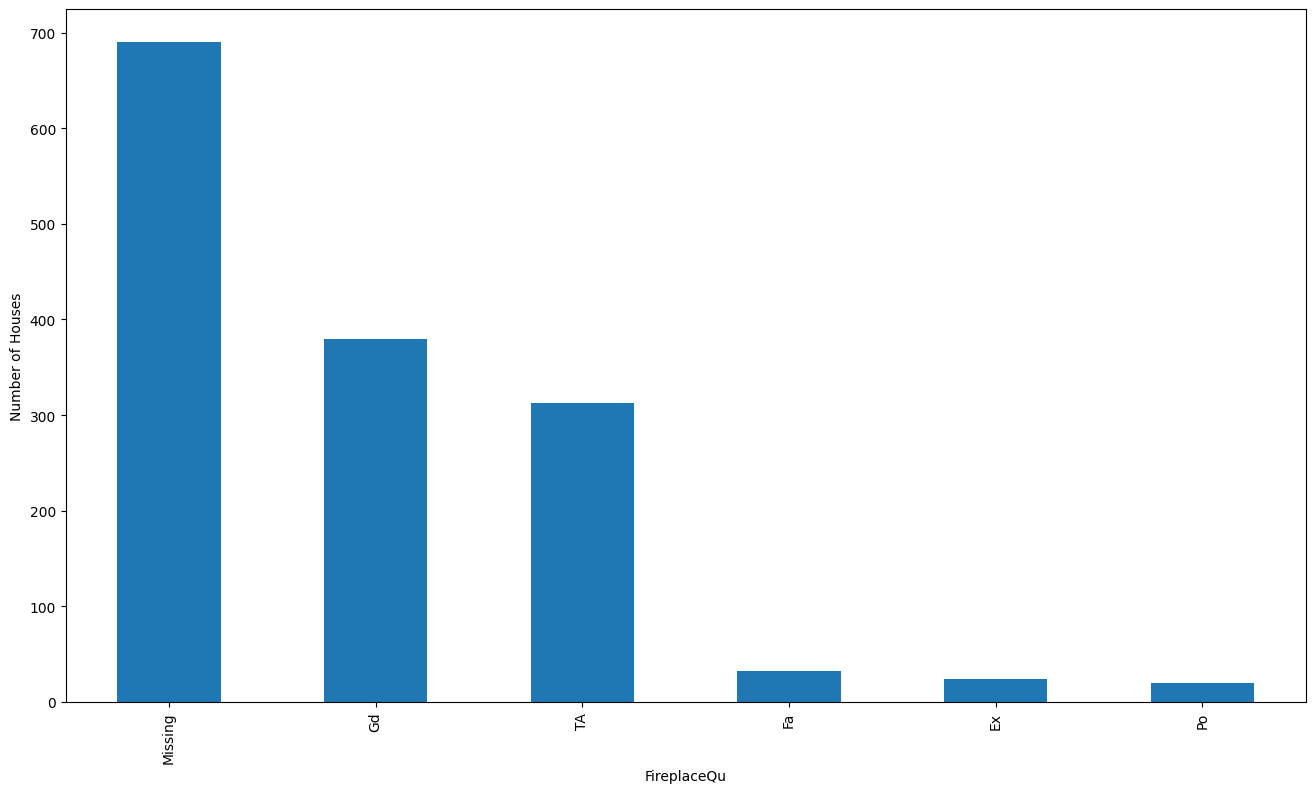

In [71]:
# Visualize

plt.figure(figsize=(16, 9))
df['FireplaceQu'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel("FireplaceQu")
plt.ylabel("Number of Houses")
plt.show()

In [69]:
# Let's again see the number of appearance of each category after imputation

df['GarageQual'].value_counts().sort_values(ascending=False)

TA         1311
Missing      81
Fa           48
Gd           14
Ex            3
Po            3
Name: GarageQual, dtype: int64

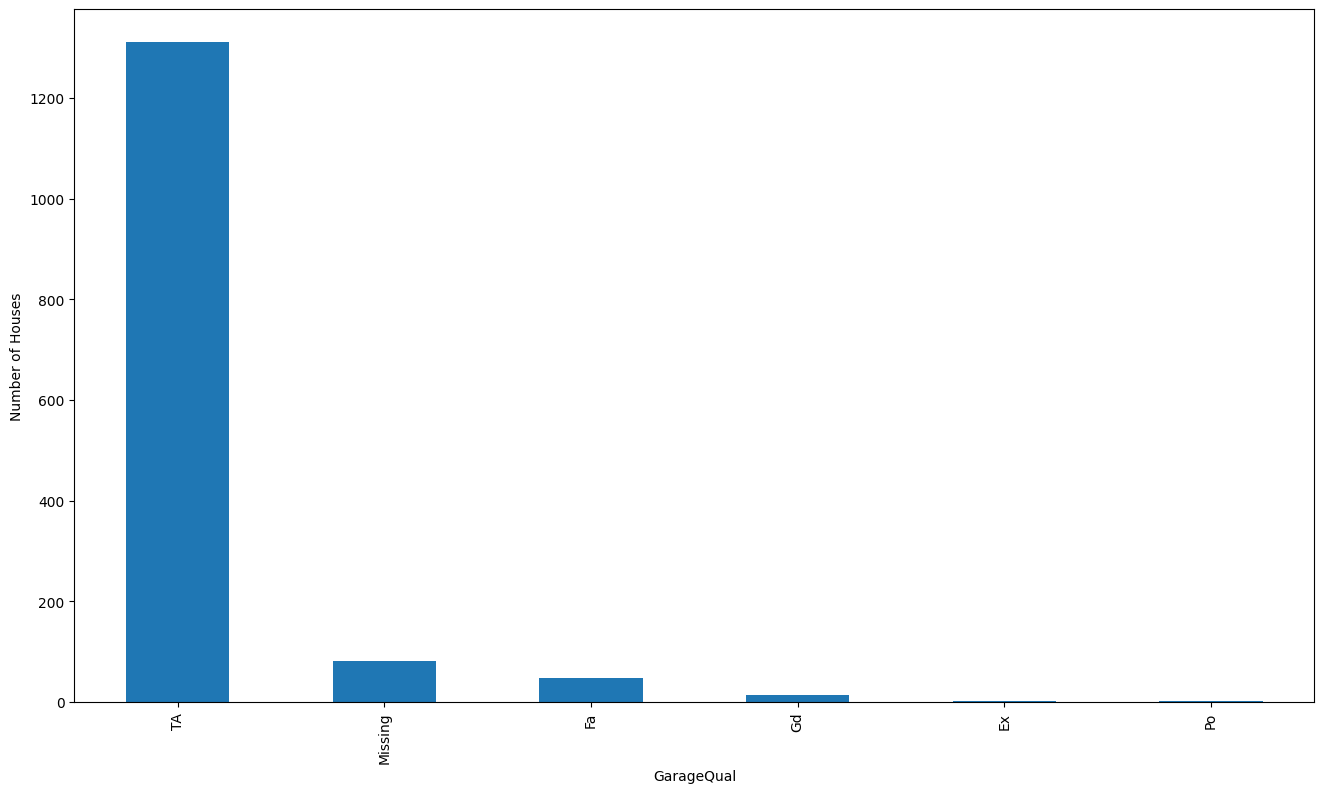

In [72]:
# Visualize

plt.figure(figsize=(16, 9))
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel("GarageQual")
plt.ylabel("Number of Houses")
plt.show()

### Using `Sklearn`

In [73]:
# importing datasets with required columns

df = pd.read_csv('datasets/cat_train.csv', usecols=['GarageQual','FireplaceQu','SalePrice'])
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [74]:
# Doing train test split

X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [75]:
# Here we create a new category named 'Missing' using the scikitlearn
# Here we will make stratey as constant

imputer = SimpleImputer(strategy='constant', fill_value="Missing")

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

In [76]:
imputer.statistics_

array(['Missing', 'Missing'], dtype=object)